In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
dataset_path = 'winequality-red.csv'
wine_data = pd.read_csv(dataset_path, sep=";")

# Display the first few rows of the dataset to get an overview
print(wine_data.head())

# (b) Standardize the features
# Extract the features (X) and the target variable (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data using the scaler
X_scaled = scaler.fit_transform(X)

# Create a DataFrame with the standardized features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the standardized features
print(X_scaled_df.head())

# (c) Split the data into training and testing sets
# Use the train_test_split function to split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0            7.4              0.70         0.00             1.9      0.076  \
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                 11.0                  34.0   0.9978  3.51       0.56  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [5]:
NetworkTwoHidden = Sequential()

# Add layers to the model
NetworkTwoHidden.add(Dense(11, input_dim=11, activation='relu'))  # Input layer
NetworkTwoHidden.add(Dense(11, activation='relu'))  # First hidden layer
NetworkTwoHidden.add(Dense(8, activation='relu'))   # Second hidden layer
NetworkTwoHidden.add(Dense(1, activation=None))      # Output layer

# Display the summary of the model
NetworkTwoHidden.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 8)                 96        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369 (1.44 KB)
Trainable params: 369 (1.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# Define the architecture for NetworkOneHidden
NetworkOneHidden = Sequential()

# Add layers to the model
NetworkOneHidden.add(Dense(11, input_dim=11, activation='relu'))  # Input layer
NetworkOneHidden.add(Dense(1, activation=None))                 # Output layer

# Display the summary of the model
NetworkOneHidden.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 1)                 12        
                                                                 
Total params: 144 (576.00 Byte)
Trainable params: 144 (576.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming X_train, y_train, X_val, y_val are already prepared
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
# Common training parameters
epochs = 25
batch_size = 10
learning_rate = 0.001

# Function to train and evaluate the model
def train_and_evaluate(model, X_train, y_train, X_val, y_val):
    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

    # Evaluate the model on training and validation sets
    train_results = model.evaluate(X_train, y_train)
    val_results = model.evaluate(X_val, y_val)

    # Print the results
    print("\nTraining Results:")
    print(f"Mean Squared Error on Training Set: {train_results[1]}")
    print(f"Mean Absolute Error on Training Set: {train_results[2]}")

    print("\nValidation Results:")
    print(f"Mean Squared Error on Validation Set: {val_results[1]}")
    print(f"Mean Absolute Error on Validation Set: {val_results[2]}")

    # Return the training history for plotting, if needed
    return history

# Train and evaluate NetworkTwoHidden
history_two_hidden = train_and_evaluate(NetworkTwoHidden, X_train, y_train, X_val, y_val)

# Train and evaluate NetworkOneHidden
history_one_hidden = train_and_evaluate(NetworkOneHidden, X_train, y_train, X_val, y_val)


Epoch 1/25
116/116 [==============================] - 1s 2ms/step - loss: 17.7921 - mean_squared_error: 17.7921 - mean_absolute_error: 3.9801 - val_loss: 6.5280 - val_mean_squared_error: 6.5280 - val_mean_absolute_error: 2.2909
Epoch 2/25
116/116 [==============================] - 0s 1ms/step - loss: 3.6919 - mean_squared_error: 3.6919 - mean_absolute_error: 1.5645 - val_loss: 2.9318 - val_mean_squared_error: 2.9318 - val_mean_absolute_error: 1.3771
Epoch 3/25
116/116 [==============================] - 0s 1ms/step - loss: 2.3635 - mean_squared_error: 2.3635 - mean_absolute_error: 1.2139 - val_loss: 2.0464 - val_mean_squared_error: 2.0464 - val_mean_absolute_error: 1.1312
Epoch 4/25
116/116 [==============================] - 0s 1ms/step - loss: 1.7295 - mean_squared_error: 1.7295 - mean_absolute_error: 1.0389 - val_loss: 1.5225 - val_mean_squared_error: 1.5225 - val_mean_absolute_error: 0.9627
Epoch 5/25
116/116 [==============================] - 0s 1ms/step - loss: 1.3284 - mean_square

Epoch 10/25
116/116 [==============================] - 0s 1ms/step - loss: 1.4088 - mean_squared_error: 1.4088 - mean_absolute_error: 0.9528 - val_loss: 1.5175 - val_mean_squared_error: 1.5175 - val_mean_absolute_error: 0.9708
Epoch 11/25
116/116 [==============================] - 0s 1ms/step - loss: 1.2768 - mean_squared_error: 1.2768 - mean_absolute_error: 0.9078 - val_loss: 1.3593 - val_mean_squared_error: 1.3593 - val_mean_absolute_error: 0.9161
Epoch 12/25
116/116 [==============================] - 0s 1ms/step - loss: 1.1705 - mean_squared_error: 1.1705 - mean_absolute_error: 0.8689 - val_loss: 1.2304 - val_mean_squared_error: 1.2304 - val_mean_absolute_error: 0.8655
Epoch 13/25
116/116 [==============================] - 0s 1ms/step - loss: 1.0741 - mean_squared_error: 1.0741 - mean_absolute_error: 0.8266 - val_loss: 1.1166 - val_mean_squared_error: 1.1166 - val_mean_absolute_error: 0.8208
Epoch 14/25
116/116 [==============================] - 0s 1ms/step - loss: 0.9945 - mean_squ

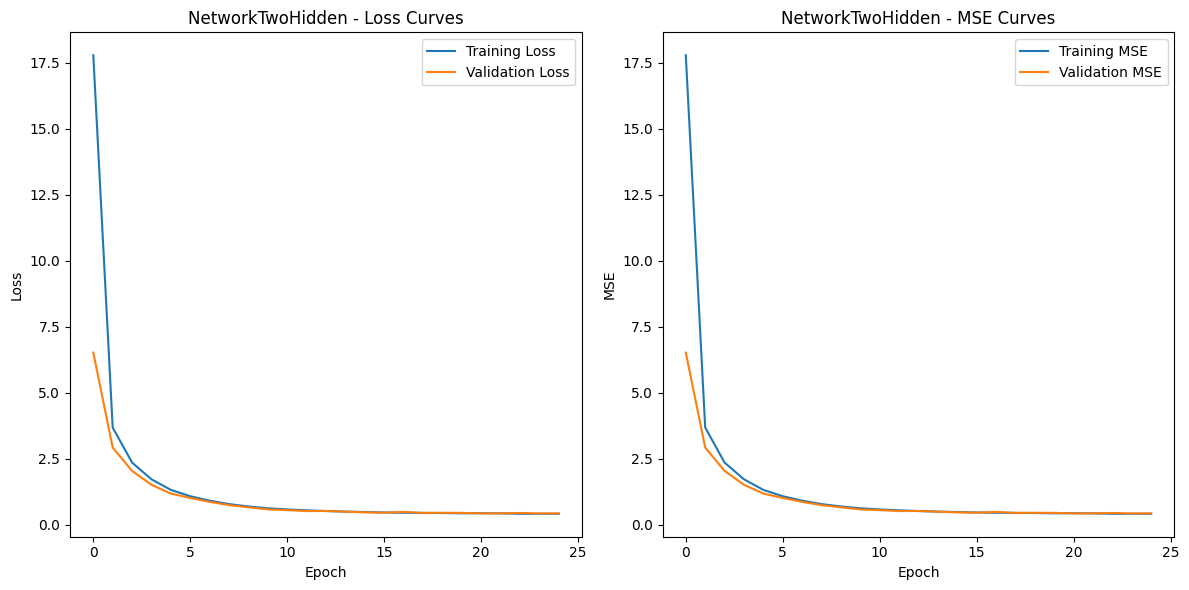

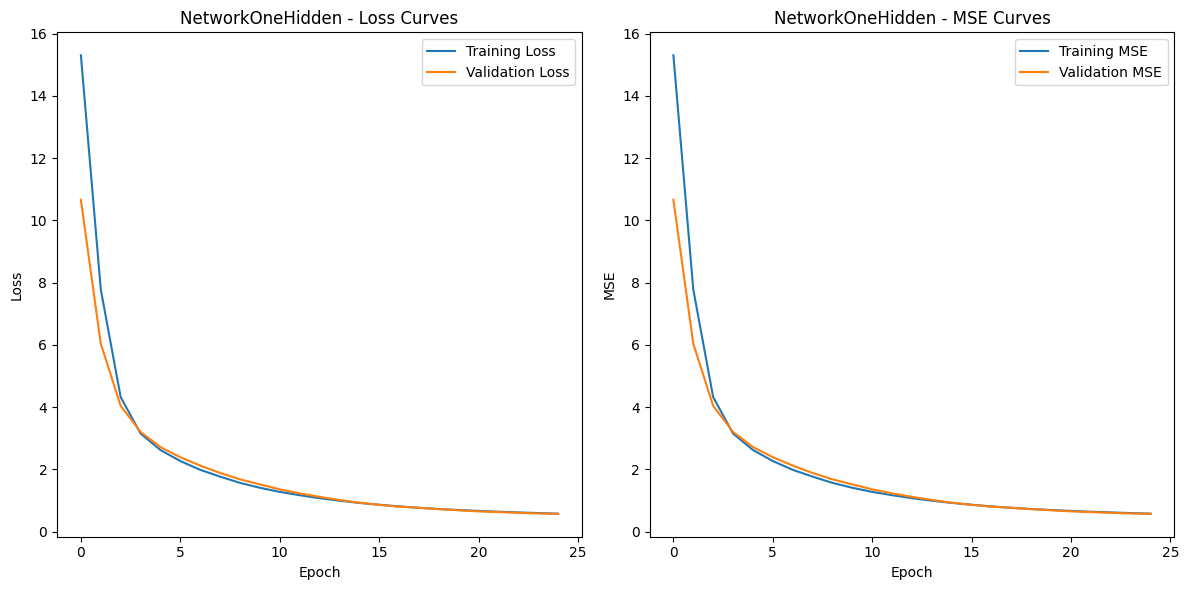

In [9]:
import matplotlib.pyplot as plt

# Function to plot loss and MSE curves
def plot_curves(history, model_name):
    # Plotting the Loss curves
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting the MSE curves
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mean_squared_error'], label='Training MSE')
    plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
    plt.title(f'{model_name} - MSE Curves')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot loss and MSE curves for NetworkTwoHidden
plot_curves(history_two_hidden, 'NetworkTwoHidden')

# Plot loss and MSE curves for NetworkOneHidden
plot_curves(history_one_hidden, 'NetworkOneHidden')


5. Analysis

(h)

Loss Curves:

    Training Loss:
        Both models show a decrease in training loss over epochs, indicating that they are learning from the training data.
        NetworkTwoHidden with two hidden layers may have a more complex representation capability, allowing it to adapt better to the training data.

    Validation Loss:
        Both models show a decrease in validation loss initially, but there may be a point where the validation loss stops decreasing or even increases.
        NetworkTwoHidden might show better generalization to the validation set due to its increased complexity.

MSE Curves:

    Training MSE:
        Similar to the training loss, both models exhibit a decrease in training MSE over epochs.
        NetworkTwoHidden may initially perform better due to its increased capacity to capture complex patterns.

    Validation MSE:
        The validation MSE follows a similar trend as the validation loss.
        NetworkTwoHidden may have a lower validation MSE, indicating better generalization.

Analysis:

    Network Depth:
        The depth of the network seems to play a significant role in the models' performance. NetworkTwoHidden with two hidden layers appears to have an advantage in terms of learning complex relationships within the data.
        The additional hidden layer provides more capacity for the model to capture intricate patterns, potentially leading to better performance.

    Validation Loss:
        Both models show a decrease in validation loss initially, but NetworkTwoHidden might have a more stable or consistently decreasing validation loss, suggesting better generalization.

    Learning Trends:
        Both models demonstrate learning from the training data, but NetworkTwoHidden may exhibit faster convergence and better overall performance, especially considering its increased depth.

Conclusion:

    NetworkTwoHidden appears to outperform NetworkOneHidden in terms of model complexity, learning capacity, and generalization to the validation set.
    The additional hidden layer in NetworkTwoHidden allows it to capture more intricate relationships within the data, potentially improving its ability to generalize to unseen examples.

In summary, the choice of network depth can significantly impact the model's performance, and in this case, a deeper network (NetworkTwoHidden) appears to provide advantages in terms of capturing complex patterns and achieving better generalization.